<a href="https://colab.research.google.com/github/reubenjrouse/NLP_DL/blob/main/BERT_LSTM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and importing

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 10.5 MB/s eta 0:00:00


In [ ]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
pip install nltk

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (17.8 MB)
  Preparing metadata (setup.py) ... done


In [ ]:
pip install opendatasets

In [ ]:
pip install spacy

In [ ]:
import nltk
import re
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
# import pandas_profiling as pp
# import warnings
# warnings.filterwarnings('ignore')
# import spacy

In [ ]:
import spacy

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

# Explorative Data Analysis

In [ ]:
df_train=pd.read_csv("/content/drive/MyDrive/CSV/tweets_train.csv")
df_test=pd.read_csv("/content/drive/MyDrive/CSV/NLP_test.csv")

In [ ]:
# pp.ProfileReport(df_train, title = 'Pandas Profiling report of "Training" set', html = {'style':{'full_width': True}})

In [ ]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


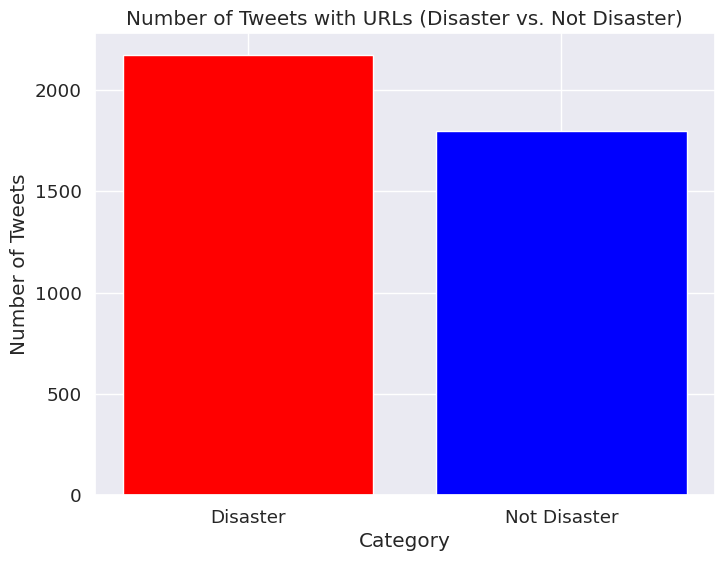

In [ ]:
def contains_url(text):
    url_pattern = r'https?://\S+|www\.\S+'
    return bool(re.search(url_pattern, text))

# Filter rows that contain URLs
url_texts = df_train[df_train['text'].apply(contains_url)]

# Count the number of disaster and non-disaster tweets with URLs
disaster_with_url = len(url_texts[(url_texts['target'] == 1)])
non_disaster_with_url = len(url_texts[(url_texts['target'] == 0)])

categories = ['Disaster', 'Not Disaster']
counts = [disaster_with_url, non_disaster_with_url]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['red', 'blue'])
plt.xlabel('Category')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets with URLs (Disaster vs. Not Disaster)')
plt.show()

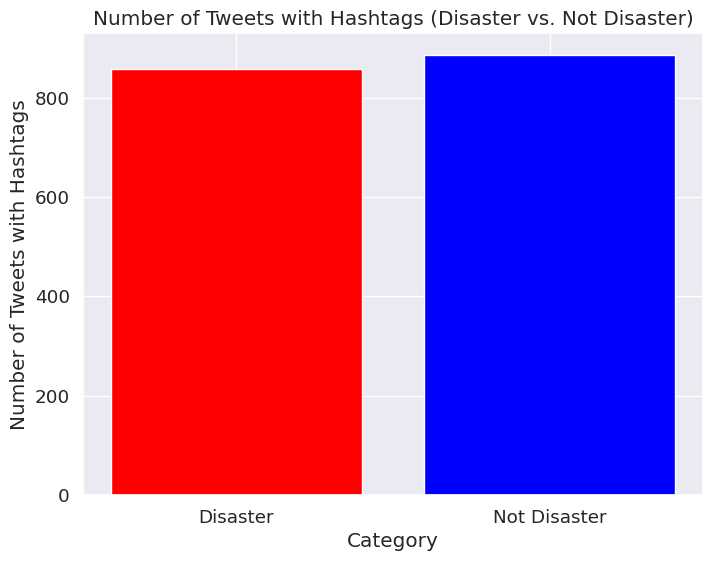

In [ ]:
def contains_hashtags(text):
    hashtag_pattern = r'#\w+'
    return bool(re.search(hashtag_pattern, text))
hashtag_disaster_tweets = df_train[(df_train['target'] == 1) & (df_train['text'].apply(contains_hashtags))]
hashtag_non_disaster_tweets = df_train[(df_train['target'] == 0) & (df_train['text'].apply(contains_hashtags))]
num_hashtag_disaster_tweets = len(hashtag_disaster_tweets)
num_hashtag_non_disaster_tweets = len(hashtag_non_disaster_tweets)
categories = ['Disaster', 'Not Disaster']
counts = [num_hashtag_disaster_tweets, num_hashtag_non_disaster_tweets]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['red', 'blue'])
plt.xlabel('Category')
plt.ylabel('Number of Tweets with Hashtags')
plt.title('Number of Tweets with Hashtags (Disaster vs. Not Disaster)')
plt.show()


# Preprocessing

In [ ]:
def lowercase(text):
    return text.lower()

In [ ]:
replacements = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "might've": "might have",
    "must've": "must have",
    "mustn't": "must not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what's": "what is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
    "I'd've": "I would have",
    "she'd've": "she would have",
    "should've": "should have",
    "could've": "could have",
    "might've": "might have",
    "would've": "would have"
}

In [ ]:
def replace_abb(text):
    for shortForm, fullForm in replacements.items():
        text = text.replace(shortForm, fullForm)

    return text

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def remove_stopwords(text):
    doc = nlp(text)
    filtered_text = ' '.join([token.lemma_ for token in doc if not token.is_stop])
    return filtered_text

In [ ]:
def remove_html_tags(input_text):
    soup = BeautifulSoup(input_text, 'html.parser')
    text_without_tags = soup.get_text()
    return text_without_tags

In [ ]:
def replace_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub("URL",data)
    return data

In [ ]:
def remove_special_characters(text):
    pattern = r'[=!#%@$^&*()_+{}\[\]:;"\'<>,.?/|\\\-]|[0-9]'
    cleaned_text = re.sub(pattern, ' ', text)
    return cleaned_text

In [ ]:
df_train['clean_text'] = df_train['text'].apply(lowercase)
df_train['clean_text'] = df_train['clean_text'].apply(replace_abb)
df_train['clean_text'] = df_train['clean_text'].apply(remove_stopwords)
df_train['clean_text'] = df_train['clean_text'].apply(remove_html_tags)
df_train['clean_text'] = df_train['clean_text'].apply(replace_url)
df_train['clean_text'] = df_train['clean_text'].apply(remove_special_characters)

<ipython-input-22-b879f9c27954>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(input_text, 'html.parser')


In [ ]:
df_train.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfire ...


In [ ]:
combined_text_pos = ' '.join(df_train[df_train['target']==1]['clean_text'])
combined_text_neg = ' '.join(df_train[df_train['target']==0]['clean_text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(combined_text_pos)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(combined_text_neg)

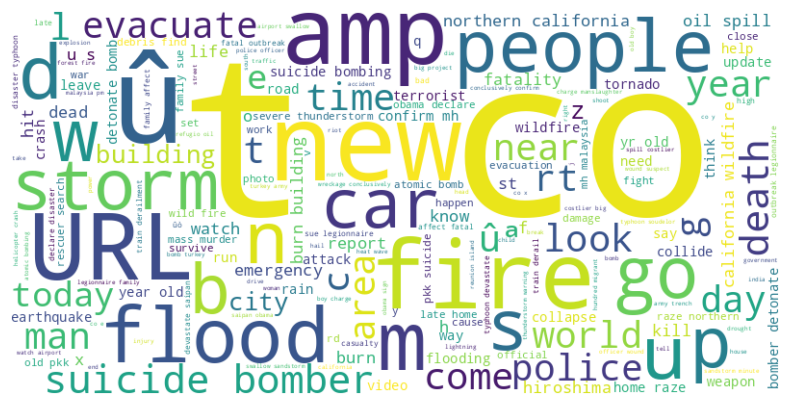

In [ ]:
#Actual disaster wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

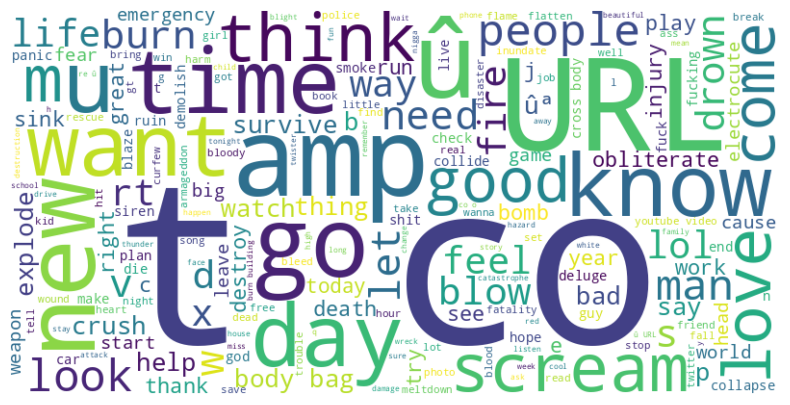

In [ ]:
#False disaster wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

In [ ]:
def remove_common_words(text):
    common_words = {"co","amp", "new"}
    letters_to_remove = r'\b[a-z]\b'  # Matches individual letters from 'a' to 'z' as whole words
    u_circumflex = '\u00FB'  # u with circumflex

    # Remove specific words
    for word in common_words:
        text = text.replace(word, '')

    # Remove individual letters from 'a' to 'z' if they are standalone words
    text = re.sub(letters_to_remove, '', text, flags=re.IGNORECASE)

    # Remove u with circumflex
    text = text.replace(u_circumflex, '')

    return text

In [ ]:
df_train['clean_text'] = df_train['clean_text'].apply(remove_common_words)

In [ ]:
df_train.nunique()

id            7613
keyword        221
location      3341
text          7503
target           2
clean_text    7473
dtype: int64

In [ ]:
def unique_id(df):
  df['unique id'] = df['clean_text'].factorize()[0] + 1
  return df

In [ ]:
df_train=unique_id(df_train)

In [ ]:
df_train['unique id'].value_counts()

3509    10
551      7
4199     6
338      6
3180     6
        ..
2505     1
2504     1
2503     1
2502     1
7473     1
Name: unique id, Length: 7473, dtype: int64

In [ ]:
df_train.loc[df_train['unique id'] == 3180]

,id,keyword,location,text,target,clean_text,unique id
3240,4656,engulfed,NaN,He came to a land which was engulfed in tribal...,0,me land engulf tribal war turn land peace m...,3180
3243,4659,engulfed,Kuwait,He came to a land which was engulfed in tribal...,1,me land engulf tribal war turn land peace m...,3180
3248,4669,engulfed,Bahrain,He came to a land which was engulfed in tribal...,1,me land engulf tribal war turn land peace m...,3180
3251,4672,engulfed,NaN,He came to a land which was engulfed in tribal...,0,me land engulf tribal war turn land peace m...,3180
3261,4684,engulfed,NaN,He came to a land which was engulfed in tribal...,0,me land engulf tribal war turn land peace m...,3180
3266,4691,engulfed,NaN,He came to a land which was engulfed in tribal...,0,me land engulf tribal war turn land peace m...,3180


In [ ]:
def fix_targets(df):
  df_mode = df.groupby('unique id').agg({'target': lambda x: x.value_counts().index[0]}).reset_index()
  df['new_target'] = df['unique id'].map(df_mode.set_index('unique id')['target'])
  return df

In [ ]:
df_train=fix_targets(df_train)

In [ ]:
df_train.loc[df_train['unique id'] == 3180]

,id,keyword,location,text,target,clean_text,unique id,new_target
3240,4656,engulfed,NaN,He came to a land which was engulfed in tribal...,0,me land engulf tribal war turn land peace m...,3180,0
3243,4659,engulfed,Kuwait,He came to a land which was engulfed in tribal...,1,me land engulf tribal war turn land peace m...,3180,0
3248,4669,engulfed,Bahrain,He came to a land which was engulfed in tribal...,1,me land engulf tribal war turn land peace m...,3180,0
3251,4672,engulfed,NaN,He came to a land which was engulfed in tribal...,0,me land engulf tribal war turn land peace m...,3180,0
3261,4684,engulfed,NaN,He came to a land which was engulfed in tribal...,0,me land engulf tribal war turn land peace m...,3180,0
3266,4691,engulfed,NaN,He came to a land which was engulfed in tribal...,0,me land engulf tribal war turn land peace m...,3180,0


# Feature Extraction

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel

import os
from sklearn.model_selection import train_test_split

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU
    print('Number of replicas:', strategy.num_replicas_in_sync)

In [ ]:
max_length = 140
batch_size = 32
val_size = 0.1

In [ ]:
model_name = "bert-base-multilingual-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)

In [ ]:
train, val = train_test_split(df_train, test_size=val_size, random_state=42)

In [ ]:
def bert_encode(data):
    tokens = tokenizer.batch_encode_plus(data, max_length=max_length, padding='max_length', truncation=True)

    return tf.constant(tokens['input_ids'])

In [ ]:
train_encoded = bert_encode(train.clean_text)
val_encoded = bert_encode(val.clean_text)


train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((train_encoded, train.new_target))
    .shuffle(100)
    .batch(batch_size)
)

val_dataset = (
    tf.data.Dataset
    .from_tensor_slices((val_encoded, val.new_target))
    .shuffle(100)
    .batch(batch_size)
)

# Training Model

In [ ]:
def bert_lstm_model():
    bert_encoder = TFBertModel.from_pretrained(model_name)
    input_word_ids = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
    last_hidden_states = bert_encoder(input_word_ids)[0]
    x = tf.keras.layers.LSTM(100, dropout=0.3, recurrent_dropout=0.3)(last_hidden_states)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=input_word_ids, outputs=output)

    return model

In [ ]:
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
with strategy.scope():
    f1_score = tfa.metrics.F1Score(num_classes=2, average='micro')
    model = bert_lstm_model()
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(loss='binary_crossentropy',optimizer=adam_optimizer,metrics=['accuracy', f1_score])

    model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 140)]             0         
                                                                 
 tf_bert_model_10 (TFBertMod  TFBaseModelOutputWithPoo  167356416
 el)                         lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             140, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                           

In [ ]:
history = model.fit(
    train_dataset,
    batch_size=batch_size,
    epochs=3,
    validation_data=val_dataset,
    verbose=2)

Epoch 1/3


215/215 - 189s - loss: 0.5057 - accuracy: 0.7600 - f1_score: 0.6001 - val_loss: 0.4269 - val_accuracy: 0.8058 - val_f1_score: 0.6082 - 189s/epoch - 877ms/step
Epoch 2/3
215/215 - 27s - loss: 0.4059 - accuracy: 0.8273 - f1_score: 0.6001 - val_loss: 0.4194 - val_accuracy: 0.8202 - val_f1_score: 0.6082 - 27s/epoch - 127ms/step
Epoch 3/3
215/215 - 28s - loss: 0.3617 - accuracy: 0.8521 - f1_score: 0.6001 - val_loss: 0.4055 - val_accuracy: 0.8294 - val_f1_score: 0.6082 - 28s/epoch - 130ms/step


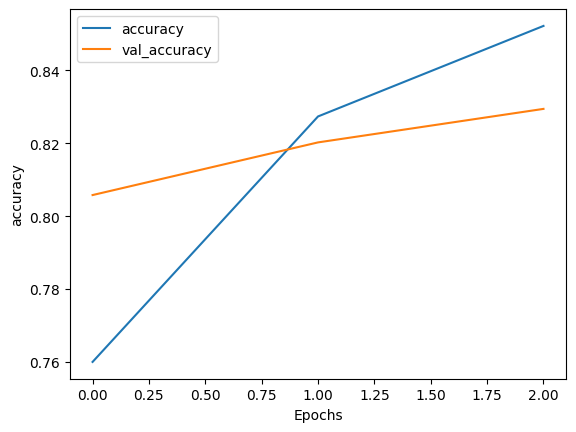

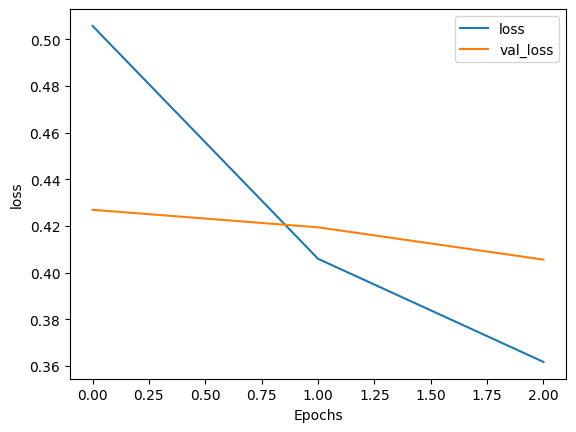

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

24/24 [==============================] - 2s 31ms/step


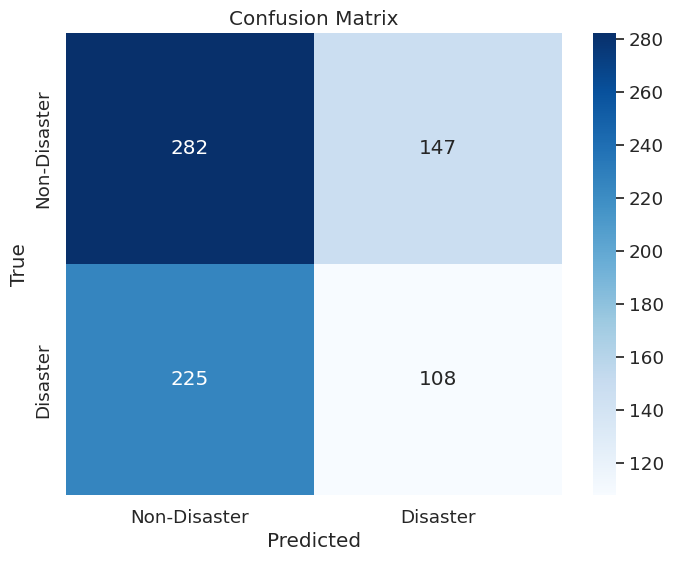

In [ ]:
y_pred = model.predict(val_dataset)

y_pred_labels = np.round(y_pred)

y_true = val.new_target.to_numpy()

confusion = confusion_matrix(y_true, y_pred_labels)

class_names = ["Non-Disaster", "Disaster"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred_labels)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.66      0.61       429
           1       0.43      0.33      0.37       333

    accuracy                           0.52       762
   macro avg       0.50      0.50      0.49       762
weighted avg       0.50      0.52      0.51       762



# Testing

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/CSV/NLP_test.csv')

In [ ]:
df_test['clean_text'] = df_test['text'].apply(lowercase)
df_test['clean_text'] = df_test['clean_text'].apply(replace_abb)
df_test['clean_text'] = df_test['clean_text'].apply(remove_stopwords)
df_test['clean_text'] = df_test['clean_text'].apply(remove_html_tags)
df_test['clean_text'] = df_test['clean_text'].apply(replace_url)
df_test['clean_text'] = df_test['clean_text'].apply(remove_special_characters)

<ipython-input-22-b879f9c27954>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(input_text, 'html.parser')


In [ ]:
test_encoded = bert_encode(df_test.clean_text)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(test_encoded)
    .batch(batch_size)
)

predicted_tweets = model.predict(test_dataset, batch_size=batch_size)
predicted_tweets_binary = tf.cast(tf.round(predicted_tweets), tf.int32).numpy().flatten()

my_submission = pd.DataFrame({'id': df_test.id, 'target': predicted_tweets_binary})
my_submission.to_csv('BERT_LSTM_5.csv', index=False)

102/102 [==============================] - 14s 88ms/step
